# Die Atome der Berechnung

## Einführung

Das Programmieren eines Quantencomputers kann jetzt jeder bequem von zu Hause aus tun. Aber was erstellen? Was ist überhaupt ein Quantenprogramm? Was ist eigentlich ein Quantencomputer?

Diese Fragen können durch Vergleiche mit herkömmlichen Digitalcomputern beantwortet werden. Leider verstehen die meisten Menschen auch nicht wirklich, wie traditionelle digitale Computer funktionieren. Auf dieser Seite betrachten wir die Grundprinzipien hinter diesen traditionellen Geräten. Um uns später den Übergang zum Quantencomputing zu erleichtern, werden wir dies mit den gleichen Tools tun, die wir auch für Quantencomputer verwenden werden.

## Informationen in Bits aufteilen

Das erste, was wir wissen müssen, ist die Idee von *Bits* . Diese sollen das einfachste Alphabet der Welt sein. Mit nur zwei Symbolen, 0 und 1, können wir jede Information darstellen.

Ein Beispiel sind Zahlen. Sie sind wahrscheinlich daran gewöhnt, eine Zahl durch eine [Folge](gloss:string) der zehn Ziffern 0, 1, 2, 3, 4, 5, 6, 7, 8 und 9 darzustellen. In dieser Ziffernfolge stellt jede Ziffer dar, wie oft die Zahl ist enthält eine gewisse [Zehnerpotenz](gloss:power) . Wenn wir zum Beispiel 213 schreiben, meinen wir:

$$ 200+10+3 $$

oder in einer Weise ausgedrückt, die die Zehnerpotenzen betont

$$ (2×10^2)+(1×10^1)+(3×10^0) $$

Obwohl wir dieses System normalerweise basierend auf der Zahl 10 verwenden, können wir genauso einfach eines basierend auf jeder anderen Zahl verwenden. Das binäre Zahlensystem basiert beispielsweise auf der Zahl Zwei. Das bedeutet, die zwei Zeichen 0 und 1 zu verwenden, um Zahlen als Vielfache von Zweierpotenzen auszudrücken. Beispielsweise wird 213 zu 11010101, da:

$$ \begin{aligned} 213 = &amp; \phantom{+}(1×2^7)+(1×2^6)+(0×2^5)\ &amp; +(1×2^4)+( 0×2^3)+(1×2^2)\ &amp; +(0×2^1)+(1×2^0) \ \end{aligned} $$

Dabei drücken wir Zahlen als Vielfache von 2, 4, 8, 16, 32 usw. statt 10, 100, 1000 usw. aus.

<!-- ::: q-block.binary -->

### Versuch es

```
q-binary
```

<!-- ::: -->

 

Diese Bitfolgen, die als binäre Zeichenfolgen bekannt sind, können verwendet werden, um mehr als nur Zahlen darzustellen. Beispielsweise gibt es eine Möglichkeit, beliebigen Text mit Bits darzustellen. Für jeden Buchstaben, jede Zahl oder jedes Satzzeichen, das Sie verwenden möchten, können Sie mithilfe [dieser Tabelle](https://www.ibm.com/docs/en/aix/7.2?topic=adapters-ascii-decimal-hexadecimal-octal-binary-conversion-table) eine entsprechende Zeichenfolge von höchstens acht Bits finden. Obwohl diese recht willkürlich sind, handelt es sich um einen allgemein anerkannten Standard. Tatsächlich wurde es verwendet, um diesen Artikel über das Internet an Sie zu übermitteln.

So werden alle Informationen in herkömmlichen Computern dargestellt. Ob Zahlen, Buchstaben, Bilder oder Töne, alles liegt in Form von binären Strings vor.

Quantencomputer basieren wie unsere Standard-Digitalcomputer auf derselben Grundidee. Der Hauptunterschied besteht darin, dass sie *Qubits verwenden,* eine Erweiterung des Bits zur [Quantenmechanik](gloss:quantum-mechanics) . Im Rest dieses Lehrbuchs werden wir untersuchen, was Qubits sind, was sie können und wie sie es tun. In diesem Abschnitt sprechen wir jedoch überhaupt nicht von Quanten. Wir verwenden Qubits also einfach so, als wären sie Bits.

<!-- ::: q-block.exercise -->

### Schnelles Quiz

<!-- ::: q-quiz(goal="intro-aoc-1") -->

<!-- ::: .question -->

Wenn Sie $n$ Bits haben, wie viele verschiedene Zahlen könnten Sie aufschreiben?

<!-- ::: -->

<!-- ::: .option -->

1. $n$

<!-- ::: -->

<!-- ::: .option -->

1. $n^2$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $2^n$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Schaltpläne

Wir haben auf der letzten Seite gesehen, dass eine Berechnung einige Eingabedaten benötigt und Operationen darauf ausführt, um einige Ausgabedaten zu erzeugen. Bei den Quantencomputern, die wir in diesem Lehrbuch kennenlernen werden, liegen diese Daten immer in Form von Bits vor. Jetzt wissen wir, was Bits sind. Mal sehen, wie wir sie manipulieren können, um die Eingaben, die wir haben, in die Ausgaben umzuwandeln, die wir brauchen.

Es ist oft nützlich, diesen Vorgang in einem Diagramm darzustellen, das als *Schaltplan bezeichnet* wird. Diese Diagramme haben Eingänge auf der linken Seite, Ausgänge auf der rechten Seite und Operationen, die durch obskure Symbole dazwischen dargestellt werden. Diese Operationen werden hauptsächlich aus historischen Gründen als „Tore“ bezeichnet. Hier ist ein Beispiel dafür, wie eine Schaltung für standardmäßige, bitbasierte Computer aussieht. Es wird nicht erwartet, dass Sie verstehen, was es tut. Es sollte Ihnen nur eine Vorstellung davon geben, wie diese Schaltungen aussehen.

![Beispiel eines klassischen Schaltplans](images/aoc/logic_gates.png)

Für Quantencomputer verwenden wir die gleiche Grundidee, haben aber unterschiedliche Konventionen für die Darstellung von Eingaben, Ausgaben und den für Operationen verwendeten Symbolen. Hier ist die „Quantenschaltung“, die den gleichen Prozess wie oben darstellt.

![Beispiel eines Quantenschaltplans](images/aoc/quantum_circuit.png)

Im Rest dieses Abschnitts erklären wir, wie man Quantenschaltkreise baut. Am Ende wissen Sie, wie Sie die obige Schaltung erstellen, was sie tut und warum sie nützlich ist.

## Schaltungen mit Qiskit erstellen

Um eine Quantenschaltung zu erstellen, importieren wir die <code>QuantumCircuit</code> -Klasse und erstellen ein neues <code>QuantumCircuit</code> Objekt.

<!-- ::: q-block.reminder -->

### Erinnerung

<summary>Python-Grundlagen (was hat es mit Klassen und Objekten auf sich?)</summary>

Wir wissen, dass wir alle Informationen mit einer Menge Bits beschreiben können, und so speichern und verarbeiten Computer alles, einschließlich Quantenschaltungen! Aber es ist für uns Menschen schwierig, darüber nachzudenken, wie wir das machen und wie wir diese Bits manipulieren, um die Schaltkreise darzustellen, die wir wollen. Die <code>QuantumCircuit</code> -Klasse ist ein Satz von Anweisungen zur Darstellung von Quantenschaltkreisen als Bits. Die Zeile <code>qc = QuantumCircuit(4, 2)</code> in der Zelle darunter ist ein Konstruktor, der Python anweist, einige Bits in Ihrem Computer beiseite zu legen, die wir verwenden, um einen Quantenschaltkreis darzustellen. Wenn wir uns auf diesen Quantenschaltkreis beziehen wollen (oder vielmehr auf die Bits, die diesen Quantenschaltkreis darstellen), verwenden wir die Variable „ <code>qc</code> “. Wir sagen, ' <code>qc</code> ' bezieht sich auf ein " <code>QuantumCircuit</code> Objekt".

<!-- vale off -->

Das erlaubt uns Menschen, auf einer hohen, abstrakten Ebene über Quantenschaltkreise nachzudenken; wir können Dinge sagen wie „X-Gate hinzufügen“ und Qiskit kümmert sich darum, was wir mit den Bits in unserem Computer tun müssen, um diese Änderung widerzuspiegeln.




<!-- ::: -->

Beim Erstellen einer Quantenschaltung müssen wir [Python](gloss:python) mitteilen, wie viele Qubits unsere Schaltung haben soll, und wir können ihr optional auch mitteilen, wie viele klassische Bits unsere Schaltung haben soll. Wir brauchen klassische Bits, um die Messungen unserer Qubits zu speichern, der Grund dafür wird später in diesem Kurs deutlich.

## Ihr erster Quantenschaltkreis

In einer Schaltung müssen wir normalerweise drei Aufgaben erledigen: Zuerst die Eingabe codieren, dann einige tatsächliche Berechnungen durchführen und schließlich eine Ausgabe extrahieren. Für Ihre erste Quantenschaltung konzentrieren wir uns auf die letzte dieser Aufgaben. Wir beginnen mit der Erstellung einer Quantenschaltung mit 3 Qubits und 3 Ausgängen.

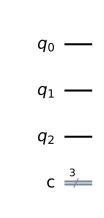

In [1]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

Schließlich erstellt uns die Methode <code>qc.draw()</code> eine Zeichnung der Schaltung. Jupyter Notebooks werten die letzte Zeile einer Codezelle aus und zeigen sie unterhalb der Zelle an. Da <code>qc.draw()</code> eine Zeichnung [zurückgibt](gloss:return) , sehen wir das unter dem Code. Es gibt noch keine Tore in unserer Schaltung, also sehen wir nur einige horizontale Linien.

<!-- ::: q-block.reminder -->

### Erinnerung


<summary>Python-Grundlagen (was ist eine Methode?)</summary> Die <code>QuantumCircuit</code> -Klasse ist eine Reihe von Anweisungen zur Darstellung von Quantenschaltkreisen als Bits, aber wenn wir einen dieser Schaltkreise ändern möchten, müssen wir auch wissen, wie die Bits entsprechend geändert werden. In [Python](gloss:python) werden Objekte mit „Methoden“ geliefert, bei denen es sich um Anweisungen handelt, um etwas mit diesem Objekt zu tun. In der obigen Zelle betrachtet die Methode <code>.draw()</code> die von uns erstellte Schaltung und erzeugt eine für Menschen lesbare Zeichnung dieser Schaltung.




<!-- ::: -->

Als nächstes brauchen wir eine Möglichkeit, unseren Quantencomputer anzuweisen, unsere Qubits zu messen und die Ergebnisse aufzuzeichnen. Dazu fügen wir unserem Quantenschaltkreis eine „Mess“-Operation hinzu. Wir können dies mit der `QuantumCircuit` `.measure()` von QuantumCircuit tun.

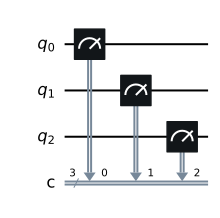

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

Lassen Sie uns als Nächstes sehen, was die Ergebnisse des Ausführens dieser Schaltung wären. Dazu verwenden wir einen Quantensimulator, einen Standardcomputer, der berechnet, was ein idealer Quantencomputer tun würde.

Es wird angenommen, dass die Simulation eines Quantencomputers für klassische Computer schwierig ist, da die besten Algorithmen, die wir haben, exponentiell mit der Anzahl der Qubits wachsen. Daher sind diese Simulationen nur für Schaltungen mit einer kleinen Anzahl von Qubits (bis zu ~30 Qubits) oder bestimmten Arten von Schaltungen möglich, für die wir einige Tricks anwenden können, um die Simulation zu beschleunigen. Dennoch sind Simulatoren sehr nützliche Werkzeuge für den Entwurf kleinerer Quantenschaltkreise.

Lassen Sie uns den Simulator von Qiskit (namens Aer) importieren und ein neues Simulatorobjekt erstellen.

In [3]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

Um die Simulation durchzuführen, können wir die Methode <code>.run()</code> des Simulators verwenden. Dies gibt einen "Job" zurück, der Informationen über das Experiment enthält, z. B. ob das Experiment läuft oder abgeschlossen ist, auf welchem Backend es ausgeführt wurde und (wichtig für uns) die Ergebnisse des Experiments.

Um die Ergebnisse aus dem Job zu erhalten, verwenden wir die Ergebnismethode, und die beliebteste Art, die Ergebnisse anzuzeigen, ist ein Wörterbuch mit "Zählungen".

In [4]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

Die Schlüssel im Zählwörterbuch sind Bit-Strings, und die Werte geben an, wie oft dieser Bit-String gemessen wurde. Die Ergebnisse von Quantencomputern können zufällig sein, daher ist es üblich, die Schaltung einige Male zu wiederholen. Dieser Zirkel wurde 1024 Mal wiederholt, was die Standardanzahl ist, um einen Zirkel in Qiskit zu wiederholen. Konventionsgemäß beginnen Qubits immer im Zustand `0` , und da wir vor der Messung nichts mit ihnen tun, sind die Ergebnisse immer `0` .

### Kodierung einer Eingabe

Sehen wir uns nun an, wie eine andere binäre Zeichenfolge als Eingabe codiert wird. Dazu benötigen wir ein sogenanntes NICHT-Gatter. Dies ist die grundlegendste Operation, die Sie in einem Computer ausführen können. Es dreht einfach den Bitwert um: 0 wird 1 und 1 wird 0. Für Qubits verwenden wir dafür ein Gatter, das als *X-Gatter* bekannt ist.

Im Folgenden erstellen wir eine neue Schaltung, die der Aufgabe des Codierens gewidmet ist:

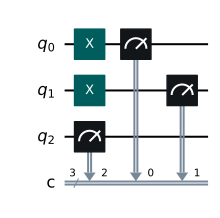

In [5]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

Und lassen Sie uns unsere Schaltung simulieren, um die Ergebnisse zu sehen:

In [6]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

<!-- ::: q-block.exercise -->

### Schnelles Quiz

<!-- ::: q-quiz(goal="intro-aoc-2") -->

<!-- ::: .question -->

Was ist die Binärzahl `011` in Dezimalzahl?

<!-- ::: -->

<!-- ::: .option -->

1. 5

<!-- ::: -->

<!-- ::: .option -->

1. 2

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 3

<!-- ::: -->

<!-- ::: -->

Ändern Sie den obigen Code, um einen Quantenschaltkreis zu erstellen, der die Zahlen 6 und 4 codiert. Entsprechen die Ergebnisse Ihren Erwartungen?

<!-- ::: -->

Jetzt wissen wir, wie man Informationen in einem Computer verschlüsselt. Der nächste Schritt ist die Verarbeitung: Eine Eingabe, die wir codiert haben, in eine Ausgabe umzuwandeln, die uns etwas Neues sagt.

## Erstellen einer Addiererschaltung

### Denken Sie daran, wie man hinzufügt

Um Inputs in Outputs umzuwandeln, müssen wir ein Problem lösen. Lassen Sie uns einige grundlegende Mathematik tun. In der Grundschule haben Sie gelernt, große mathematische Probleme in überschaubare Stücke zu zerlegen. Wie würden Sie zum Beispiel vorgehen, um diese Additionsaufgabe zu lösen?

<!-- ::: q-block -->

### Merken, wie man hinzufügt

<!-- ::: q-carousel -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/0/0.svg)

Wie können wir ein solches Problem lösen? Klicken Sie sich durch dieses Karussell, um es herauszufinden.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/0/1.svg)

Eine Möglichkeit ist, es Ziffer für Ziffer von rechts nach links zu tun. Also fangen wir mit 3+4 an.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/0/2.svg)

Und dann 1+5.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/0/3.svg)

Dann 2+8.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/0/4.svg)

Endlich haben wir 9+1+1 und bekommen unsere Antwort.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Dies mag nur eine einfache Addition sein, aber es demonstriert die Prinzipien hinter allen Algorithmen. Ob der Algorithmus darauf ausgelegt ist, mathematische Probleme zu lösen oder Text oder Bilder zu verarbeiten, wir zerlegen große Aufgaben immer in kleine und einfache Schritte.

Um auf einem Computer zu laufen, müssen Algorithmen auf die kleinsten und einfachsten Schritte herunterkompiliert werden. Um zu sehen, wie diese aussehen, machen wir das obige Additionsproblem noch einmal, aber in Binärform.

<!-- ::: q-block -->

### Binärzahlen addieren

<!-- ::: q-carousel -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/0.svg)

Beachten Sie, dass die zweite Zahl auf der linken Seite ein paar zusätzliche Nullen hat. Dies dient nur dazu, die beiden Saiten gleich lang zu machen.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/1.svg)

Unsere erste Aufgabe besteht darin, die 1+0 für die rechte Spalte zu machen. Im Binärsystem ist die Antwort wie in jedem Zahlensystem 1.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/2.svg)

Dasselbe Ergebnis erhalten wir für die 0+1 der zweiten Spalte.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/3.svg)

Als nächstes haben wir 1+1. Wie Sie sicher wissen, ist 1+1=2. Binär wird die Zahl 2 als 10 geschrieben und erfordert daher zwei Bits. Das bedeutet, dass wir die 1 übertragen müssen, genauso wie wir es für die Zahl 10 in Dezimalzahlen tun würden. In der nächsten Spalte müssen wir nun 1+1+1 berechnen. Das bedeutet, drei Zahlen zusammenzuzählen, also wird es für unseren Computer kompliziert.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/4.svg)

Aber wir können es immer noch auf einfachere Operationen herunterkompilieren, und zwar auf eine Weise, bei der wir immer nur zwei Bits addieren müssen. Dazu können wir nur mit den ersten beiden 1en beginnen.

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/5.svg)

Jetzt müssen wir diese 10 zur letzten 1 hinzufügen, was mit unserer üblichen Methode zum Durchgehen der Spalten erfolgen kann. Die endgültige Antwort ist 11 (auch bekannt als 3).

<!-- ::: -->

<!-- ::: div -->

![Bild der Zugabe](images/aoc/carousel/1/6.svg)

Jetzt können wir uns dem Rest des Problems zuwenden. Mit der Antwort 11 haben wir ein weiteres Carry-Bit. Jetzt haben wir also ein weiteres 1+1+1 vor uns. Aber wir wissen bereits, wie das geht, also ist es keine große Sache.

<!-- ::: -->

<!-- ::: div -->

Tatsächlich ist alles, was bisher übrig geblieben ist, etwas, von dem wir bereits wissen, wie es geht. Das liegt daran, dass, wenn Sie alles in nur zwei Bits aufteilen, es nur vier mögliche Dinge gibt, die Sie jemals berechnen müssen. Hier sind die vier Grundsummen (wir schreiben alle Antworten mit zwei Bits, um konsistent zu sein):

![Bild der Zugabe](images/aoc/carousel/1/7.svg)

Dies wird als Halbaddierer bezeichnet. Wenn unser Computer dies implementieren und viele davon verketten kann, kann er alles hinzufügen.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

### Hinzufügen mit Quantenschaltkreisen

Lassen Sie uns unseren eigenen Halbaddierer aus einer Quantenschaltung bauen. Dies umfasst einen Teil der Schaltung, der die Eingabe codiert, einen Teil, der den Algorithmus ausführt, und einen Teil, der das Ergebnis extrahiert. Der erste Teil muss geändert werden, wenn wir eine neue Eingabe verwenden möchten, aber der Rest bleibt immer gleich.

![Überblick über unsere Addiererschaltung](images/aoc/half-adder.svg)

Die beiden Bits, die wir hinzufügen möchten, sind in den Qubits 0 und 1 codiert. Das obige Beispiel codiert eine 1 in diesen beiden Qubits und versucht daher, die Lösung von 1+1 zu finden. Das Ergebnis wird eine Folge von zwei Bits sein, die wir aus den Qubits 2 und 3 auslesen. Es bleibt nur noch, das eigentliche Programm auszufüllen, das in der Leerstelle in der Mitte lebt.

Die gestrichelten Linien im Bild dienen nur zur Unterscheidung der verschiedenen Teile der Schaltung (obwohl sie auch interessantere Verwendungszwecke haben können).

Die Grundoperationen des Rechnens sind als Logikgatter bekannt. Wir haben bereits das NICHT-Gatter verwendet, aber das reicht nicht aus, um unseren Halbaddierer zu machen. Wir konnten es nur verwenden, um die Antworten manuell aufzuschreiben. Da wir möchten, dass der Computer die eigentliche Berechnung für uns erledigt, benötigen wir einige leistungsfähigere Gates.

Um zu sehen, was wir brauchen, schauen wir uns noch einmal an, was unser Halbaddierer tun muss.

![erforderliche Operationen eines Halbaddierers](images/aoc/half_adder_reqs.svg)

Das Bit ganz rechts in allen vier Antworten wird vollständig davon bestimmt, ob die beiden Bits, die wir hinzufügen, gleich oder unterschiedlich sind. Für 0+0 und 1+1, wo die beiden Bits gleich sind, ergibt das Bit ganz rechts der Antwort 0. Für 0+1 und 1+0, wo wir unterschiedliche Bitwerte addieren, ist das Bit ganz rechts 1.

Um diesen Teil unserer Lösung richtig zu machen, brauchen wir etwas, das herausfinden kann, ob zwei Bits unterschiedlich sind oder nicht. Traditionell wird dies beim Studium digitaler Berechnungen als XOR-Gatter bezeichnet.

<table>
<thead>
  <tr>
    <th>Eingang 1</th>
    <th>Eingang 2</th>
    <th>XOR-Ausgabe</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
</tbody>
</table>

In Quantencomputern wird die Arbeit des XOR-Gatters vom „kontrollierten NICHT-Gatter“ erledigt. Da das ein ziemlich langer Name ist, nennen wir ihn normalerweise einfach „CNOT“. In Schaltplänen wird es wie im Bild unten gezeichnet. Dies wird auf ein Paar Qubits angewendet. Eines fungiert als Kontroll-Qubit (das ist das mit dem kleinen Punkt). Das andere fungiert als Ziel-Qubit (mit dem großen Kreis und dem Kreuz – so etwas wie eine Zielmarke).

![Bild des CNOT-Gatters](images/aoc/cnot_xor.svg)

In Qiskit können wir die `.cx()` Methode verwenden, um unserer Schaltung ein CNOT hinzuzufügen. Wir müssen die Indizes der beiden Qubits, auf die es wirkt, als Argumente angeben. Hier ist ein Beispiel:

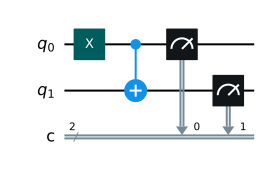

Result:  {'11': 1024}


In [7]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

Für unseren Halbaddierer wollen wir keinen unserer Eingänge überschreiben. Stattdessen wollen wir das Ergebnis auf ein anderes Qubit-Paar schreiben. Dazu können wir zwei CNOTs verwenden und die Ausgabe in ein neues Qubit schreiben, von dem wir wissen, dass es den Zustand 0 haben wird:

![Schaltplan der Verwendung von zwei CNOTs zum Erstellen eines XOR-Gatters](images/aoc/xor.svg)

Wir sind jetzt auf halbem Weg zu einem voll funktionsfähigen Halbaddierer. Wir wissen, wie man das Ausgabebit ganz rechts berechnet, also müssen wir nur noch herausfinden, wie man das linke Ausgabebit berechnet. Wenn Sie sich die vier möglichen Summen noch einmal ansehen, werden Sie feststellen, dass es nur einen Fall gibt, bei dem dies 1 statt 0 ist: 1+1=10. Es passiert nur, wenn beide Bits, die wir hinzufügen, 1 sind.

![erforderliche Operationen eines Halbaddierers](images/aoc/half_adder_reqs.svg)

Um diesen Teil der Ausgabe zu berechnen, könnten wir unseren Computer einfach dazu bringen, zu prüfen, ob beide Eingaben 1 sind. Wenn sie es sind – und nur wenn sie es sind – müssen wir ein NOT-Gate auf Qubit 3 machen. Das wird es umkehren nur für diesen Fall auf den erforderlichen Wert von 1, was uns die benötigte Ausgabe liefert.

Dafür brauchen wir ein neues Gate: wie ein CNOT, aber gesteuert auf zwei Qubits statt nur auf einem. Dadurch wird nur dann ein NOT für das Ziel-Qubit ausgeführt, wenn sich beide Steuerelemente im Zustand 1 befinden. Dieses neue Gate wird als [Toffoli](gloss:toffoli) -Gate bezeichnet. Für diejenigen unter Ihnen, die mit booleschen Logikgattern vertraut sind, handelt es sich im Grunde genommen um ein UND-Gatter.

![Halbaddierer-Quantenschaltung](images/aoc/ha_circuit.svg)

In Qiskit können wir dies mit der Methode `.ccx()` zu einer Schaltung hinzufügen. Und da haben wir es! Eine Schaltung, die das berühmte mathematische Problem 1+1 berechnen kann.

<!-- ::: q-block.exercise -->

### Versuch es

Ordnen Sie die Blöcke an, um den Codeblock zu erstellen, der die obige Halbaddiererschaltung erzeugen würde.

```
q-drag-and-drop-code(goal="intro-aoc-3")
    .line from qiskit import QuantumCircuit
    .line qc = QuantumCircuit(4, 2)
    .line(group=0) qc.cx(0, 2)
    .line(group=0) qc.cx(1, 2)
    .line(group=0) qc.ccx(0, 1, 3)
    .result-info
```

<!-- ::: -->

Groß! Jetzt haben wir unseren Halbaddierer, das nächste, was wir tun müssen, um zu überprüfen, ob er funktioniert. Dazu erstellen wir eine weitere Schaltung, die einige Eingaben codiert, den Halbaddierer anwendet und die Ausgabe extrahiert. 

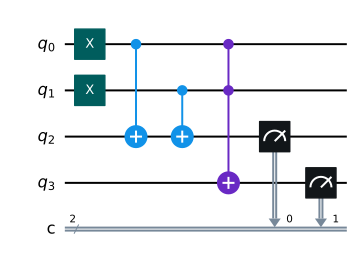

In [8]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

In [9]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

Hier können wir sehen, dass das Ergebnis „10“ 1024 Mal gemessen wurde und wir kein anderes Ergebnis gemessen haben.

<!-- ::: q-block.exercise -->

### Übung

Überprüfen Sie, ob die Halbaddiererschaltung für alle vier möglichen Eingänge funktioniert.

[Versuchen Sie es in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

Der Halbaddierer enthält alles, was Sie zum Addieren benötigen. Mit den Gattern NOT, CNOT und Toffoli können wir Programme erstellen, die eine beliebige Menge von Zahlen beliebiger Größe addieren.

Diese drei Gatter reichen aus, um auch alles andere im Computerbereich zu erledigen. Tatsächlich können wir sogar auf die CNOT verzichten. Außerdem wird das NICHT-Gatter nur wirklich benötigt, um Bits mit dem Wert 1 zu erzeugen. Das Toffoli-Gatter ist im Wesentlichen das Atom der Mathematik. Es ist das einfachste Element, aus dem sich jede andere Problemlösungstechnik zusammenstellen lässt.